# Decision Tree

In [1]:
! pip list | grep scikit-learn

scikit-learn            1.0.2


## Load and investigate the iris dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
# extract 'petal length (cm)' and 'petal width (cm)'
X = iris.data[:, [2, 3]]
# ['setosa' 'versicolor' 'virginica']
y = iris.target

print(X[:5])
print(y[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0]


In [4]:
def summary(value):
    if isinstance(value, list) or isinstance(value, np.ndarray):
        if len(value) > 10:
            return value[:5]
        else:
            return value
    else:
        return value

for key, value in zip(iris.keys(), iris.values()):
    if key in ['frame', 'DESCR', 'filename', 'data_module']:
        continue
    print('{}:\n{}\n'.format(key, summary(value)))

data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

target:
[0 0 0 0 0]

target_names:
['setosa' 'versicolor' 'virginica']

feature_names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
print(X_train[:5])
print(X_test[:5])
print(y_train[:5])
print(y_test[:5])

[[1.4 0.2]
 [1.7 0.2]
 [5.3 2.3]
 [5.7 2.1]
 [1.2 0.2]]
[[5.4 2.3]
 [1.7 0.4]
 [1.4 0.3]
 [4.5 1.7]
 [4.4 1.4]]
[0 0 2 2 0]
[2 0 0 2 1]


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

<ipython-input-7-a2fb3c03d1d9>:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


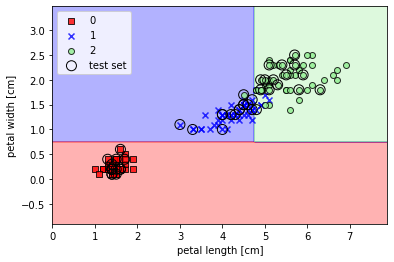

In [8]:
# https://scikit-learn.org/stable/modules/tree.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier, export_text

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_train)+len(X_test)))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [9]:
r = export_text(tree, feature_names=iris['feature_names'][2:])
print(r)

|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.15
|   |   |   |--- class: 2



In [10]:
from sklearn.metrics import confusion_matrix

y_pred = tree.predict(X_test)

# confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# accuracy
print(tree.score(X_test, y_test))
print(np.trace(conf_mat) / len(y_test))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
0.9555555555555556
0.9555555555555556


## Generalization performance

In [11]:
total = len(y_train)
print(f'total train data={total}')
for ratio in [.01, .05, .1, .3, .5, 1.]:
    n_elem = int(total * ratio) 
    X_train_sub = X_train[:n_elem]
    y_train_sub = y_train[:n_elem]

    tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    tree.fit(X_train_sub, y_train_sub)
    r = export_text(tree, feature_names=iris['feature_names'][2:])
    print(f'[{ratio}]')
    print(r)
    print(tree.score(X_test, y_test))
    print()

total train data=105
[0.01]
|--- class: 0

0.3333333333333333

[0.05]
|--- petal width (cm) <= 1.15
|   |--- class: 0
|--- petal width (cm) >  1.15
|   |--- class: 2

0.6666666666666666

[0.1]
|--- petal width (cm) <= 1.45
|   |--- petal length (cm) <= 3.15
|   |   |--- class: 0
|   |--- petal length (cm) >  3.15
|   |   |--- class: 1
|--- petal width (cm) >  1.45
|   |--- class: 2

0.8888888888888888

[0.3]
|--- petal length (cm) <= 4.75
|   |--- petal length (cm) <= 2.60
|   |   |--- class: 0
|   |--- petal length (cm) >  2.60
|   |   |--- class: 1
|--- petal length (cm) >  4.75
|   |--- class: 2

0.9555555555555556

[0.5]
|--- petal length (cm) <= 4.75
|   |--- petal length (cm) <= 2.60
|   |   |--- class: 0
|   |--- petal length (cm) >  2.60
|   |   |--- class: 1
|--- petal length (cm) >  4.75
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 5.00
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.00
|   |   |   |--- class: 2
|   |--- petal width (cm) >